# Deep Learning [1] - Intro to Neural Networks

In [ ]:
# Ensure you're running on Google Colab
!pip install tensorflow matplotlib

# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import random

Sample images from the dataset:


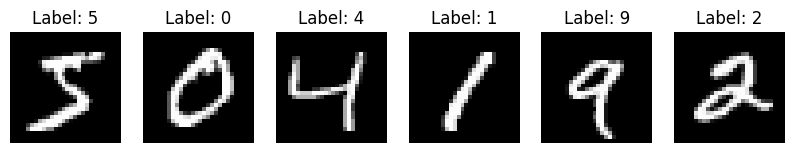

In [ ]:
# 1. Load and visualize the MNIST dataset
# The MNIST dataset consists of handwritten digits (0-9)
# The dataset is pre-split into training and test sets by default

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize the first few training images
def visualize_samples(X, y, num_samples=6):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

print("Sample images from the dataset:")
visualize_samples(X_train, y_train)

In [ ]:
# 2. Preprocess the data
# Neural networks perform better when input values are small (e.g., between 0 and 1)
# So we normalize the pixel values of the images (from 0-255 to 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to add a single channel dimension (for grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# 3. Build the neural network model
# We will create a simple feedforward neural network with one hidden layer
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
print("Neural network architecture:")
model.summary()

Neural network architecture:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (

In [ ]:
# 4. Train the model
# To help students visualize training progress, we'll capture the training history
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1484 - accuracy: 0.9560 - val_loss: 0.0597 - val_accuracy: 0.9806
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0512 - accuracy: 0.9843 - val_loss: 0.0498 - val_accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0493 - val_accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0445 - val_accuracy: 0.9862
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.0454 - val_accuracy: 0.9862


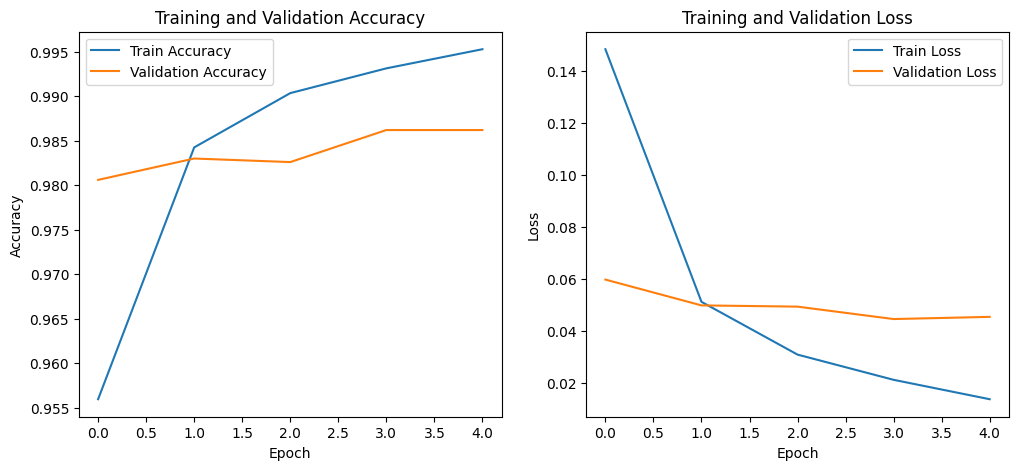

In [ ]:
# 5. Visualize training history
# We'll plot accuracy and loss for both training and validation sets
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
# 6. Evaluate the model on test data
# After training, we evaluate the model using the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0454 - accuracy: 0.9862
Test accuracy: 0.9862


Visualizing model predictions on random test data:
1/1 [==============================] - 0s 27ms/step


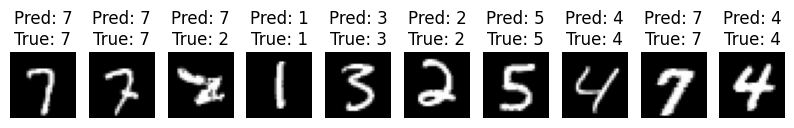

In [ ]:
# 7. Visualize predictions on a random set of 10 images
def visualize_random_predictions(X_test, y_test, model, num_samples=10):
    # Randomly select 10 indices from the test set
    random_indices = random.sample(range(X_test.shape[0]), num_samples)

    # Get the selected images and labels
    X_random = X_test[random_indices]
    y_random = y_test[random_indices]

    # Make predictions on the randomly selected images
    predictions = model.predict(X_random)

    # Plot the images and their predicted vs actual labels
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_random[i].reshape(28, 28), cmap='gray')
        pred_label = np.argmax(predictions[i])
        true_label = y_random[i]
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis('off')
    plt.show()

print("Visualizing model predictions on random test data:")
visualize_random_predictions(X_test, y_test, model)